# Ppk vs % OOS Analysis for One-Sided Normal Distribution

This notebook demonstrates the relationship between Process Performance Index (Ppk) and the percentage of Out-of-Specification (OOS) units for a one-sided normal distribution.

## Theory

For a one-sided specification with an upper specification limit (USL):
- **Ppk = (USL - μ) / (3σ)** where μ is the process mean and σ is the process standard deviation
- **% OOS = 100 × Φ((μ - USL)/σ)** where Φ is the standard normal CDF

The relationship can be derived as:
- **% OOS = 100 × Φ(-3 × Ppk)**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set up plotting parameters for better visualization
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

In [29]:
def ppk_to_oos_percent(ppk):
    """
    Convert Ppk to percentage Out-of-Specification for one-sided normal distribution.
    
    Parameters:
    ppk (float or array): Process Performance Index
    
    Returns:
    float or array: Percentage of units Out-of-Specification
    
    Formula: % OOS = 100 × Φ(-3 × Ppk)
    where Φ is the standard normal cumulative distribution function
    """
    return 100 * stats.norm.cdf(-3 * ppk)

def oos_percent_to_ppk(oos_percent):
    """
    Convert percentage Out-of-Specification to Ppk for one-sided normal distribution.
    
    Parameters:
    oos_percent (float or array): Percentage of units Out-of-Specification
    
    Returns:
    float or array: Process Performance Index
    
    Formula: Ppk = -Φ⁻¹(% OOS / 100) / 3
    where Φ⁻¹ is the inverse standard normal cumulative distribution function
    """
    return -stats.norm.ppf(oos_percent / 100) / 3

In [30]:
def ppk_to_oos_percent_two_sided(ppk):
    """
    Convert Ppk to percentage Out-of-Specification for two-sided normal distribution.
    Assumes a CENTERED process where the mean is at the midpoint of specifications.
    
    Parameters:
    ppk (float or array): Process Performance Index
    
    Returns:
    float or array: Percentage of units Out-of-Specification
    
    Formula: % OOS = 200 × Φ(-3 × Ppk)
    where Φ is the standard normal cumulative distribution function
    
    NOTE: This assumes μ = (USL + LSL)/2. For off-center processes, 
    the relationship between Ppk and %OOS is NOT a fixed ratio!
    """
    return 200 * stats.norm.cdf(-3 * ppk)

def oos_percent_to_ppk_two_sided(oos_percent):
    """
    Convert percentage Out-of-Specification to Ppk for two-sided normal distribution.
    Assumes a CENTERED process where the mean is at the midpoint of specifications.
    
    Parameters:
    oos_percent (float or array): Percentage of units Out-of-Specification
    
    Returns:
    float or array: Process Performance Index
    
    Formula: Ppk = -Φ⁻¹(% OOS / 200) / 3
    where Φ⁻¹ is the inverse standard normal cumulative distribution function
    """
    return -stats.norm.ppf(oos_percent / 200) / 3

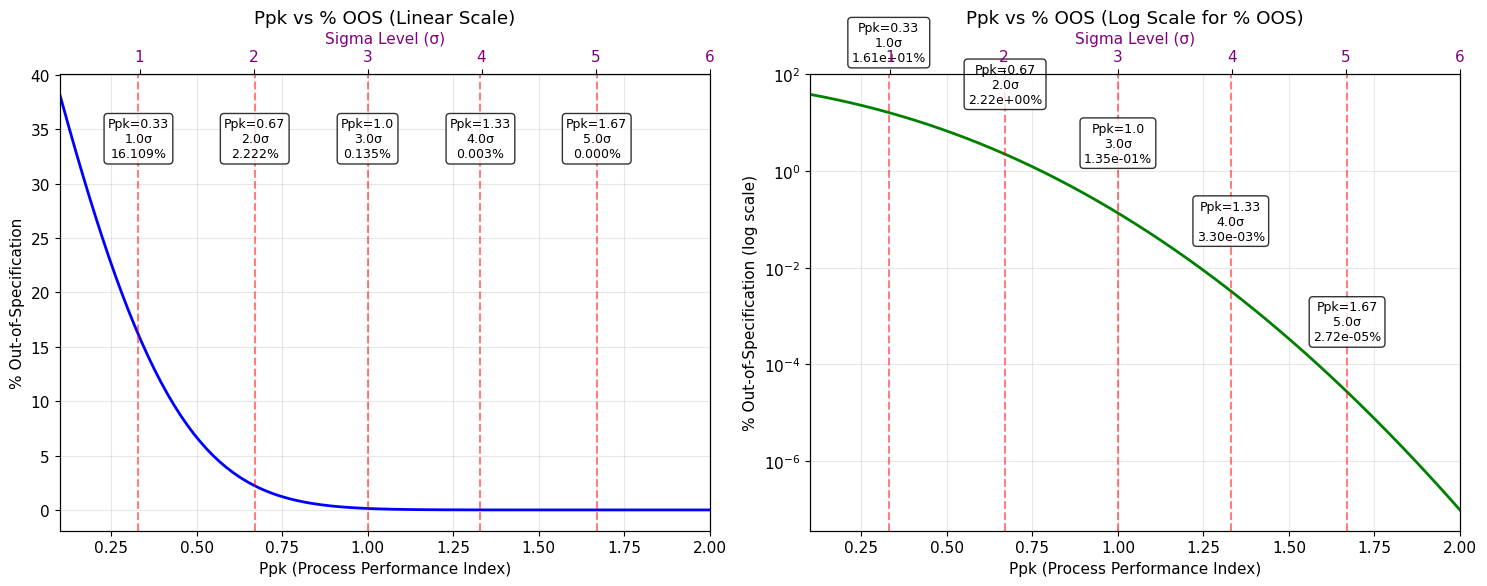

In [31]:
# Generate Ppk values from 0.1 to 2.0
ppk_values = np.linspace(0.1, 2.0, 200)

# Calculate corresponding % OOS values
oos_percent_values = ppk_to_oos_percent(ppk_values)

# Create the main plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Ppk vs % OOS (linear scale)
ax1.plot(ppk_values, oos_percent_values, 'b-', linewidth=2, label='Ppk vs % OOS')
ax1.set_xlabel('Ppk (Process Performance Index)')
ax1.set_ylabel('% Out-of-Specification')
ax1.set_title('Ppk vs % OOS (Linear Scale)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.1, 2.0)

# Add secondary x-axis for Sigma levels
ax1_sigma = ax1.twiny()
ax1_sigma.set_xlim(0.3, 6.0)  # Sigma levels corresponding to Ppk 0.1-2.0
ax1_sigma.set_xlabel('Sigma Level (σ)', color='purple')
ax1_sigma.tick_params(axis='x', labelcolor='purple')

# Add some reference lines for common Ppk values (including 1-sigma)
reference_ppk = [0.33, 0.67, 1.0, 1.33, 1.67]  # Added 0.33 for 1-sigma
for ppk_ref in reference_ppk:
    oos_ref = ppk_to_oos_percent(ppk_ref)
    sigma_level = ppk_ref * 3  # Convert Ppk to sigma level
    ax1.axvline(x=ppk_ref, color='red', linestyle='--', alpha=0.5)
    ax1.text(ppk_ref, ax1.get_ylim()[1]*0.9, f'Ppk={ppk_ref}\n{sigma_level:.1f}σ\n{oos_ref:.3f}%', 
             ha='center', va='top', fontsize=9, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Plot 2: Ppk vs % OOS (log scale for % OOS)
ax2.semilogy(ppk_values, oos_percent_values, 'g-', linewidth=2, label='Ppk vs % OOS (log scale)')
ax2.set_xlabel('Ppk (Process Performance Index)')
ax2.set_ylabel('% Out-of-Specification (log scale)')
ax2.set_title('Ppk vs % OOS (Log Scale for % OOS)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0.1, 2.0)

# Add secondary x-axis for Sigma levels on log plot
ax2_sigma = ax2.twiny()
ax2_sigma.set_xlim(0.3, 6.0)  # Sigma levels corresponding to Ppk 0.1-2.0
ax2_sigma.set_xlabel('Sigma Level (σ)', color='purple')
ax2_sigma.tick_params(axis='x', labelcolor='purple')

# Add reference lines for log plot
for ppk_ref in reference_ppk:
    oos_ref = ppk_to_oos_percent(ppk_ref)
    sigma_level = ppk_ref * 3  # Convert Ppk to sigma level
    ax2.axvline(x=ppk_ref, color='red', linestyle='--', alpha=0.5)
    ax2.text(ppk_ref, oos_ref*10, f'Ppk={ppk_ref}\n{sigma_level:.1f}σ\n{oos_ref:.2e}%', 
             ha='center', va='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [32]:
# Create a summary table for common Ppk values
ppk_common = np.array([0.33, 0.67, 1.0, 1.33, 1.67, 2.0])
oos_common = ppk_to_oos_percent(ppk_common)

# Calculate defects per million opportunities (DPMO)
dpmo = oos_common * 10000  # Convert % to DPMO

summary_df = pd.DataFrame({
    'Ppk': ppk_common,
    '% OOS': oos_common,
    'DPMO': dpmo,
    'Sigma Level (approx)': ppk_common * 3  # Approximate sigma level
})

print("Summary Table: Ppk vs % OOS vs DPMO")
print("=" * 50)
print(summary_df.round(6))

Summary Table: Ppk vs % OOS vs DPMO
    Ppk      % OOS           DPMO  Sigma Level (approx)
0  0.33  16.108706  161087.059511                  0.99
1  0.67   2.221559   22215.594429                  2.01
2  1.00   0.134990    1349.898032                  3.00
3  1.33   0.003304      33.036648                  3.99
4  1.67   0.000027       0.272150                  5.01
5  2.00   0.000000       0.000987                  6.00


In [33]:
# Interactive exploration: Calculate % OOS for user-defined Ppk
print("Interactive Calculation Examples:")
print("=" * 40)

# Example calculations
test_ppk_values = [0.5, 1.0, 1.5, 2.0]

for ppk in test_ppk_values:
    oos = ppk_to_oos_percent(ppk)
    print(f"Ppk = {ppk:4.1f} → % OOS = {oos:10.6f}% → DPMO = {oos*10000:10.2f}")

print("\nReverse calculation (% OOS to Ppk):")
print("-" * 40)

test_oos_values = [0.1, 1.0, 5.0, 10.0]

for oos in test_oos_values:
    ppk = oos_percent_to_ppk(oos)
    print(f"% OOS = {oos:5.1f}% → Ppk = {ppk:6.3f}")

Interactive Calculation Examples:
Ppk =  0.5 → % OOS =   6.680720% → DPMO =   66807.20
Ppk =  1.0 → % OOS =   0.134990% → DPMO =    1349.90
Ppk =  1.5 → % OOS =   0.000340% → DPMO =       3.40
Ppk =  2.0 → % OOS =   0.000000% → DPMO =       0.00

Reverse calculation (% OOS to Ppk):
----------------------------------------
% OOS =   0.1% → Ppk =  1.030
% OOS =   1.0% → Ppk =  0.775
% OOS =   5.0% → Ppk =  0.548
% OOS =  10.0% → Ppk =  0.427


## Key Insights

1. **Exponential Relationship**: The relationship between Ppk and % OOS is exponential - small improvements in Ppk lead to dramatic reductions in % OOS.

2. **Industry Benchmarks**:
   - **Ppk = 1.0**: Approximately 0.135% OOS (1,350 DPMO)
   - **Ppk = 1.33**: Approximately 0.0063% OOS (63 DPMO) - Often considered "adequate"
   - **Ppk = 1.67**: Approximately 0.000057% OOS (0.57 DPMO) - World class performance

3. **Practical Application**: Use this relationship to:
   - Set realistic quality targets
   - Estimate defect rates from Ppk measurements
   - Determine required process improvement for quality goals

## Mathematical Foundation

The mathematical relationship is based on the standard normal distribution:
- For a process with mean μ and standard deviation σ
- With upper specification limit USL
- The probability of exceeding USL is Φ((μ - USL)/σ)
- Since Ppk = (USL - μ)/(3σ), we get % OOS = 100 × Φ(-3 × Ppk)

In [34]:
# Interactive examples for two-sided calculations
print("\nTwo-Sided Interactive Calculation Examples:")
print("=" * 50)

# Example calculations for two-sided
test_ppk_2s = [0.5, 1.0, 1.5, 2.0]

for ppk in test_ppk_2s:
    oos_1s = ppk_to_oos_percent(ppk)
    oos_2s = ppk_to_oos_percent_two_sided(ppk)
    ratio = oos_2s / oos_1s
    print(f"Ppk = {ppk:4.1f} → 1S: {oos_1s:8.4f}% | 2S: {oos_2s:8.4f}% | Ratio: {ratio:5.2f}x")

print("\nReverse calculation (% OOS to Ppk) - Two-Sided:")
print("-" * 50)

test_oos_2s = [0.2, 2.0, 10.0, 20.0]  # Higher values for two-sided

for oos in test_oos_2s:
    ppk_2s = oos_percent_to_ppk_two_sided(oos)
    print(f"% OOS = {oos:5.1f}% (2S) → Ppk = {ppk_2s:6.3f}")


Two-Sided Interactive Calculation Examples:
Ppk =  0.5 → 1S:   6.6807% | 2S:  13.3614% | Ratio:  2.00x
Ppk =  1.0 → 1S:   0.1350% | 2S:   0.2700% | Ratio:  2.00x
Ppk =  1.5 → 1S:   0.0003% | 2S:   0.0007% | Ratio:  2.00x
Ppk =  2.0 → 1S:   0.0000% | 2S:   0.0000% | Ratio:  2.00x

Reverse calculation (% OOS to Ppk) - Two-Sided:
--------------------------------------------------
% OOS =   0.2% (2S) → Ppk =  1.030
% OOS =   2.0% (2S) → Ppk =  0.775
% OOS =  10.0% (2S) → Ppk =  0.548
% OOS =  20.0% (2S) → Ppk =  0.427


In [35]:
# Create comparison summary table for one-sided vs two-sided
ppk_common_2s = np.array([0.33, 0.67, 1.0, 1.33, 1.67, 2.0])
oos_1s = ppk_to_oos_percent(ppk_common_2s)  # One-sided
oos_2s = ppk_to_oos_percent_two_sided(ppk_common_2s)  # Two-sided

# Calculate DPMO for both cases
dpmo_1s = oos_1s * 10000
dpmo_2s = oos_2s * 10000

comparison_df = pd.DataFrame({
    'Ppk': ppk_common_2s,
    'Sigma Level': ppk_common_2s * 3,
    '% OOS (1-sided)': oos_1s,
    '% OOS (2-sided)': oos_2s,
    'DPMO (1-sided)': dpmo_1s,
    'DPMO (2-sided)': dpmo_2s,
    'Ratio (2S/1S)': oos_2s / oos_1s
})

print("Comparison Table: One-Sided vs Two-Sided Ppk")
print("=" * 60)
print(comparison_df.round(6))

Comparison Table: One-Sided vs Two-Sided Ppk
    Ppk  Sigma Level  % OOS (1-sided)  % OOS (2-sided)  DPMO (1-sided)  \
0  0.33         0.99        16.108706        32.217412   161087.059511   
1  0.67         2.01         2.221559         4.443119    22215.594429   
2  1.00         3.00         0.134990         0.269980     1349.898032   
3  1.33         3.99         0.003304         0.006607       33.036648   
4  1.67         5.01         0.000027         0.000054        0.272150   
5  2.00         6.00         0.000000         0.000000        0.000987   

   DPMO (2-sided)  Ratio (2S/1S)  
0   322174.119022            2.0  
1    44431.188859            2.0  
2     2699.796063            2.0  
3       66.073295            2.0  
4        0.544300            2.0  
5        0.001973            2.0  


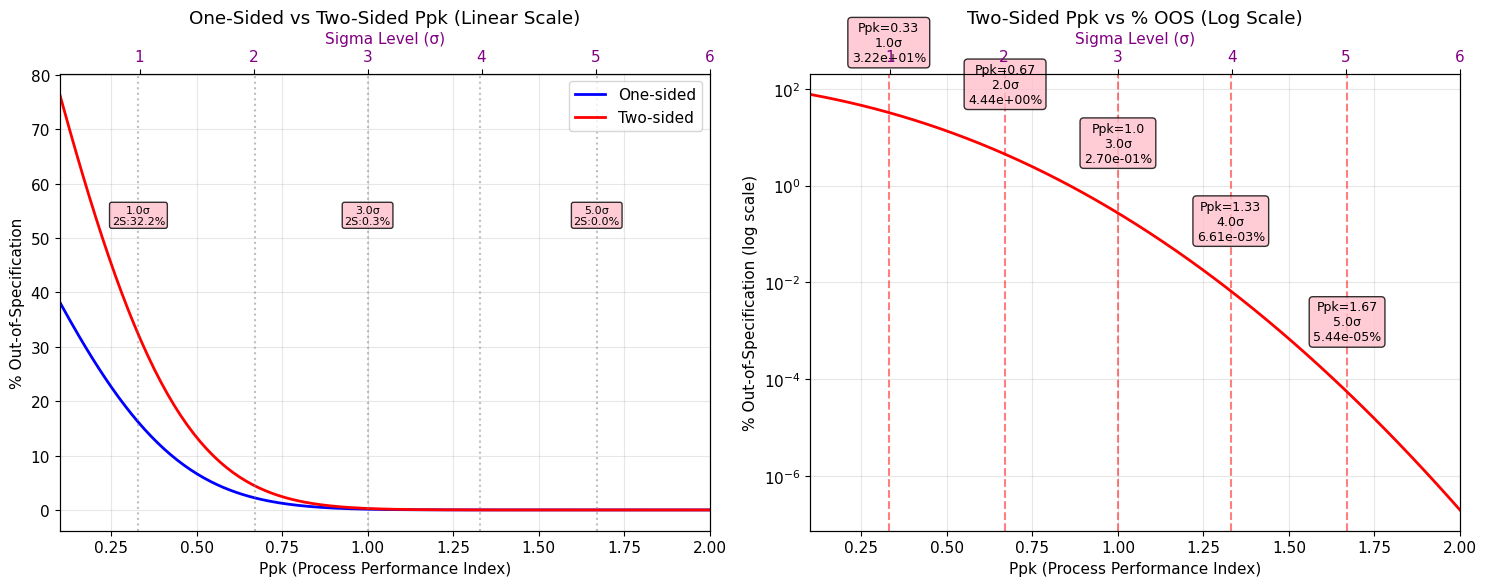

In [36]:
# Generate Ppk values from 0.1 to 2.0 for two-sided analysis
ppk_values_2s = np.linspace(0.1, 2.0, 200)

# Calculate corresponding % OOS values for both one-sided and two-sided
oos_percent_1s = ppk_to_oos_percent(ppk_values_2s)  # One-sided
oos_percent_2s = ppk_to_oos_percent_two_sided(ppk_values_2s)  # Two-sided

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Comparison of one-sided vs two-sided (linear scale)
ax1.plot(ppk_values_2s, oos_percent_1s, 'b-', linewidth=2, label='One-sided')
ax1.plot(ppk_values_2s, oos_percent_2s, 'r-', linewidth=2, label='Two-sided')
ax1.set_xlabel('Ppk (Process Performance Index)')
ax1.set_ylabel('% Out-of-Specification')
ax1.set_title('One-Sided vs Two-Sided Ppk (Linear Scale)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.1, 2.0)
ax1.legend()

# Add secondary x-axis for Sigma levels
ax1_sigma = ax1.twiny()
ax1_sigma.set_xlim(0.3, 6.0)
ax1_sigma.set_xlabel('Sigma Level (σ)', color='purple')
ax1_sigma.tick_params(axis='x', labelcolor='purple')

# Add reference lines for two-sided
reference_ppk_2s = [0.33, 0.67, 1.0, 1.33, 1.67]
for ppk_ref in reference_ppk_2s:
    oos_ref_2s = ppk_to_oos_percent_two_sided(ppk_ref)
    sigma_level = ppk_ref * 3
    ax1.axvline(x=ppk_ref, color='gray', linestyle=':', alpha=0.5)
    if ppk_ref in [0.33, 1.0, 1.67]:  # Show only some labels to avoid crowding
        ax1.text(ppk_ref, ax1.get_ylim()[1]*0.7, f'{sigma_level:.1f}σ\n2S:{oos_ref_2s:.1f}%', 
                 ha='center', va='top', fontsize=8, 
                 bbox=dict(boxstyle='round,pad=0.2', facecolor='pink', alpha=0.8))

# Plot 2: Two-sided only (log scale)
ax2.semilogy(ppk_values_2s, oos_percent_2s, 'r-', linewidth=2, label='Two-sided')
ax2.set_xlabel('Ppk (Process Performance Index)')
ax2.set_ylabel('% Out-of-Specification (log scale)')
ax2.set_title('Two-Sided Ppk vs % OOS (Log Scale)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0.1, 2.0)

# Add secondary x-axis for log plot
ax2_sigma = ax2.twiny()
ax2_sigma.set_xlim(0.3, 6.0)
ax2_sigma.set_xlabel('Sigma Level (σ)', color='purple')
ax2_sigma.tick_params(axis='x', labelcolor='purple')

# Add reference lines for two-sided log plot
for ppk_ref in reference_ppk_2s:
    oos_ref_2s = ppk_to_oos_percent_two_sided(ppk_ref)
    sigma_level = ppk_ref * 3
    ax2.axvline(x=ppk_ref, color='red', linestyle='--', alpha=0.5)
    ax2.text(ppk_ref, oos_ref_2s*10, f'Ppk={ppk_ref}\n{sigma_level:.1f}σ\n{oos_ref_2s:.2e}%', 
             ha='center', va='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='pink', alpha=0.8))

plt.tight_layout()
plt.show()

In [37]:
def ppk_to_oos_percent_two_sided(ppk):
    """
    Convert Ppk to percentage Out-of-Specification for two-sided normal distribution.
    Assumes a centered process where the mean is at the midpoint of specifications.
    
    Parameters:
    ppk (float or array): Process Performance Index
    
    Returns:
    float or array: Percentage of units Out-of-Specification
    
    Formula: % OOS = 200 × Φ(-3 × Ppk)
    where Φ is the standard normal cumulative distribution function
    """
    return 200 * stats.norm.cdf(-3 * ppk)

def oos_percent_to_ppk_two_sided(oos_percent):
    """
    Convert percentage Out-of-Specification to Ppk for two-sided normal distribution.
    Assumes a centered process where the mean is at the midpoint of specifications.
    
    Parameters:
    oos_percent (float or array): Percentage of units Out-of-Specification
    
    Returns:
    float or array: Process Performance Index
    
    Formula: Ppk = -Φ⁻¹(% OOS / 200) / 3
    where Φ⁻¹ is the inverse standard normal cumulative distribution function
    """
    return -stats.norm.ppf(oos_percent / 200) / 3

# Two-Sided Ppk vs % OOS Analysis

This section demonstrates the relationship for **two-sided normal distributions** with both upper and lower specification limits.

## Theory for Two-Sided Specifications

For a two-sided specification with both upper (USL) and lower (LSL) specification limits:
- **Ppk = min(Ppku, Ppkl)** where:
  - **Ppku = (USL - μ) / (3σ)** (upper capability)
  - **Ppkl = (μ - LSL) / (3σ)** (lower capability)
- **% OOS = 100 × [Φ((LSL - μ)/σ) + Φ((μ - USL)/σ)]**

For a **centered process** (μ = (USL + LSL)/2), the relationship simplifies to:
- **% OOS = 200 × Φ(-3 × Ppk)** (approximately double the one-sided case)